# Data Analysis Project: Bike Sharing Dataset
- **Name:** Bagas Aulia Alfasyam
- **Email:** bagasaulia7@gmail.com
- **Dicoding ID:** bagason

## Defining Business Questions

- How does the pattern of bike usage vary by season and weather conditions?
- What are the behavioral differences between casual and registered users in using the Bike Sharing service?
- When are the peak times for bike usage and how do weekdays affect the number of rentals?
- Can we identify the main factors that influence the number of bike rentals?

## Import All Packages/Libraries Used

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import calendar
%matplotlib inline

## Set visualization aesthetics for better visuals

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## Data Wrangling

### Gathering Data

In [3]:
hour_data = pd.read_csv('./Dataset/hour.csv')
day_data = pd.read_csv('./Dataset/day.csv')

In [4]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Knowing the number of rows and columns in `hour_data`

In [5]:
print(f"Jumlah baris: {hour_data.shape[0]}, Jumlah kolom: {hour_data.shape[1]}")

Jumlah baris: 17379, Jumlah kolom: 17


In [6]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Knowing the number of rows and columns in `day_data`


In [7]:
print(f"Jumlah baris: {day_data.shape[0]}, Jumlah kolom: {day_data.shape[1]}")

Jumlah baris: 731, Jumlah kolom: 16


**Insight :**

- `pd.read_csv("day.csv")` is used to read a CSV file with comma separator.
- `head()` is used to display the first 5 rows of the dataset.
- This process is done to ensure that the data has been successfully loaded into the Pandas DataFrame before proceeding to further data wrangling.
- `.shape` is used to find out the number of rows.

### Assessing Data

In [8]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- The `hour_data` dataset has **17 columns** and **17,379 rows**, while `day_data` has **16 columns** and **731 rows**.
- `hour_data` records data **per hour**, while `day_data` contains **daily aggregates** of bike users.
- There are **no missing values**, but the `dteday` column is still in **object** format and needs to be converted to **datetime**.
- The number of rows in `hour_data` **does not exactly match** the number of days × 24 hours, so further checking is needed.
- The next steps are **data cleaning**, checking for **duplicates**, and validating **data consistency** between the two datasets. 🔥

In [10]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

The results above show that there are no missing values in the `day_data` and `hour_data` datasets.

In [12]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

The results above show that there are no duplicated data in the `day_data` and `hour_data` datasets.


In [14]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

- Displays descriptive statistics from `hour_data` and `day_data`.
- There is a significant difference between the maximum and average values of the `cnt` column in `hour_data` and `day_data`, indicating that the daily `cnt` value is not directly an aggregate of the hourly `cnt` values.
- The minimum value in the `casual`, `registered`, and `cnt` columns is 0 in both datasets, which could indicate no rentals or potential data errors.
- The distribution of `windspeed` values in `hour_data` has greater variation compared to `day_data`, which may indicate the presence of outliers or inconsistencies in hourly weather data recording.
- There is a value of `weathersit` = 4, which is suspicious because documentation usually only mentions values 1–3. This could be noise or invalid data that needs to be cleaned.

In [16]:
# Menampilkan nilai unik dari beberapa kolom kategorikal pada day_data
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(f"Unique values in '{column}': {day_data[column].unique()}")

Unique values in 'season': [1 2 3 4]
Unique values in 'yr': [0 1]
Unique values in 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in 'holiday': [0 1]
Unique values in 'weekday': [6 0 1 2 3 4 5]
Unique values in 'workingday': [0 1]
Unique values in 'weathersit': [2 1 3]


In [17]:
# Menampilkan nilai unik dari beberapa kolom kategorikal pada hour_data
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(f"Unique values in '{column}': {hour_data[column].unique()}")

Unique values in 'season': [1 2 3 4]
Unique values in 'yr': [0 1]
Unique values in 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in 'holiday': [0 1]
Unique values in 'weekday': [6 0 1 2 3 4 5]
Unique values in 'workingday': [0 1]
Unique values in 'weathersit': [1 2 3 4]


**Insight:**

- The `weathersit` variable (weather situation) shows differences between the two datasets
- The daily data (`day_data`) has 3 unique values: [1, 2, 3] in weathersit
- The hourly data (`hour_data`) has 4 unique values: [1, 2, 3, 4] in weathersit
- Value 4 appears only in the hourly data, not in the daily data
- This may indicate rare or extreme weather conditions
- Extreme weather conditions may appear at the hourly level but "average out" when aggregated to the daily level
- The two datasets may cover slightly different time periods
- There may be differences in how weather situations are recorded between the two datasets
- All other categorical variables match exactly between the two datasets, making the difference in `weathersit` important to investigate

In [18]:
# Mencari baris di day_data yang memiliki workingday = 1 dan holiday = 1 secara bersamaan
inconsistent_days = day_data[(day_data['workingday'] == 1) & (day_data['holiday'] == 1)]

# Menampilkan hasil pengecekan
if inconsistent_days.empty:
    print("Tidak ditemukan inkonsistensi antara workingday dan holiday.")
else:
    print("Ditemukan inkonsistensi data:")
    print(inconsistent_days)


Tidak ditemukan inkonsistensi antara workingday dan holiday.


In [19]:
# Mencari baris di hour_data yang memiliki workingday = 1 dan holiday = 1 secara bersamaan
inconsistent_days = hour_data[(hour_data['workingday'] == 1) & (hour_data['holiday'] == 1)]

# Menampilkan hasil pengecekan
if inconsistent_days.empty:
    print("Tidak ditemukan inkonsistensi antara workingday dan holiday.")
else:
    print("Ditemukan inkonsistensi data:")
    print(inconsistent_days)


Tidak ditemukan inkonsistensi antara workingday dan holiday.


**Insight:**

- The code checks for inconsistencies between the `workingday` and `holiday` variables in both datasets
- The logic focuses on finding rows with `workingday = 1` and `holiday = 1` at the same time
- In `day_data` (daily data), no inconsistencies were found
- In `hour_data` (hourly data), no inconsistencies were found either
- This shows that both datasets have good consistency
- This consistency means there are no days categorized as both working days (`workingday = 1`) and holidays (`holiday = 1`) at the same time
- This matches the general logic that a day cannot be both a working day and a holiday at the same time
- This result shows good data quality in day grouping categories

In [20]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight :**

- The `hour_data` dataset has 17,379 rows, while `day_data` has 731 rows
- This difference in the number of rows matches the nature of the data - `hour_data` contains hourly data, while `day_data` contains daily data
- The `hour_data` dataset has 17 columns, one more than `day_data` which has 16 columns
- The additional column in `hour_data` is `hr` (hour), which of course does not exist in the daily aggregate data
- Both datasets have consistent data types for the same columns
- All columns in both datasets have no null values (all with non-null counts equal to the number of rows)
- Data types consist of `int64` for categorical data and target variables, `float64` for continuous measurements, and `object` for dates
- The `dteday` column is of type `object`, indicating that the date has not been converted to datetime format
- Both datasets have the same categories and seem related - the daily data is likely an aggregate of the hourly data

### Cleaning Data

In [22]:
# Konversi kolom tanggal ke tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Verifikasi konversi
print("\nTipe data dteday setelah konversi (day_data):", day_data['dteday'].dtype)
print("Tipe data dteday setelah konversi (hour_data):", hour_data['dteday'].dtype)


Tipe data dteday setelah konversi (day_data): datetime64[ns]
Tipe data dteday setelah konversi (hour_data): datetime64[ns]


**Insight:**

- Converts the date column (`dteday`) from object type to datetime

In [23]:
hour_data['year'] = hour_data['dteday'].dt.year
hour_data['month'] = hour_data['dteday'].dt.month
hour_data['day'] = hour_data['dteday'].dt.day
hour_data['hour'] = hour_data['hr']
hour_data['day_of_week'] = hour_data['dteday'].dt.dayofweek

**Insight:**

- Creates additional time-based features for analysis


In [24]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

**Insight:**

- Creates more readable labels for categorical variables


In [25]:
# Pengecekan duplikasi data
day_duplicates = day_data.duplicated().sum()
hour_duplicates = hour_data.duplicated().sum()

print("\nJumlah duplikasi pada day_data:", day_duplicates)
print("Jumlah duplikasi pada hour_data:", hour_duplicates)


Jumlah duplikasi pada day_data: 0
Jumlah duplikasi pada hour_data: 0


**Insight:**

- No duplicated data


In [26]:
# Memeriksa missing values
print("\n=== Missing Values Day Data ===")
print(day_data.isnull().sum())

print("\n=== Missing Values Hour Data ===")
print(hour_data.isnull().sum())


=== Missing Values Day Data ===
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

=== Missing Values Hour Data ===
instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
year           0
month          0
day            0
hour           0
day_of_week    0
dtype: int64


**Insight :**
- Checks for missing values in both datasets
- No missing values found that need to be handled

In [27]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [56]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


=== Outliers in day_data['temp'] ===
Lower bound: -0.14041600000000015, Upper bound: 1.1329160000000003
Number of outliers: 0


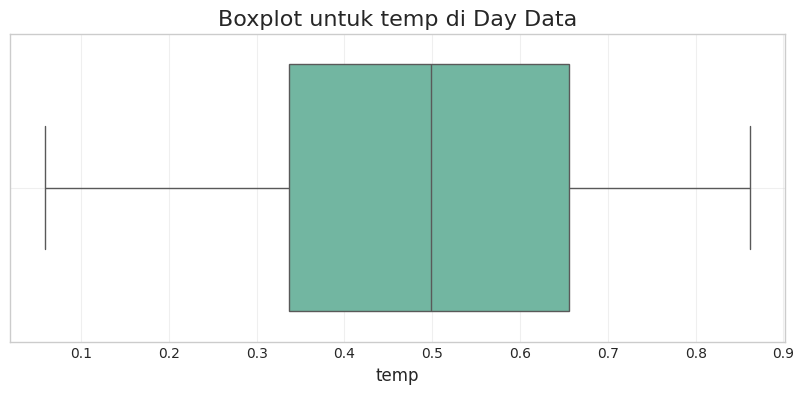


=== Outliers in day_data['atemp'] ===
Lower bound: -0.06829675000000018, Upper bound: 1.0147412500000002
Number of outliers: 0


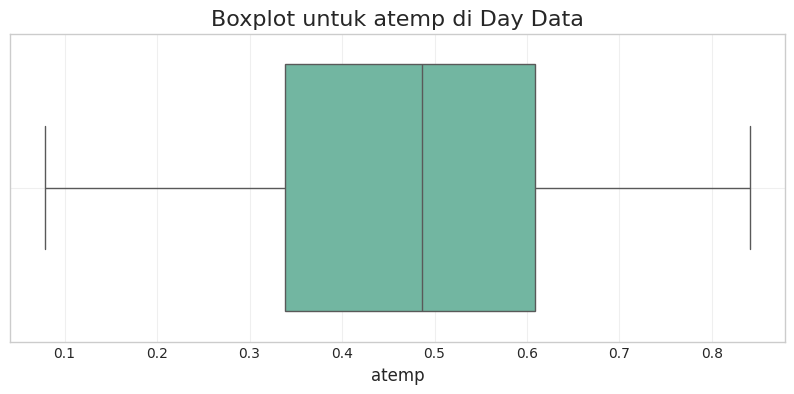


=== Outliers in day_data['hum'] ===
Lower bound: 0.20468725, Upper bound: 1.0455212500000002
Number of outliers: 2


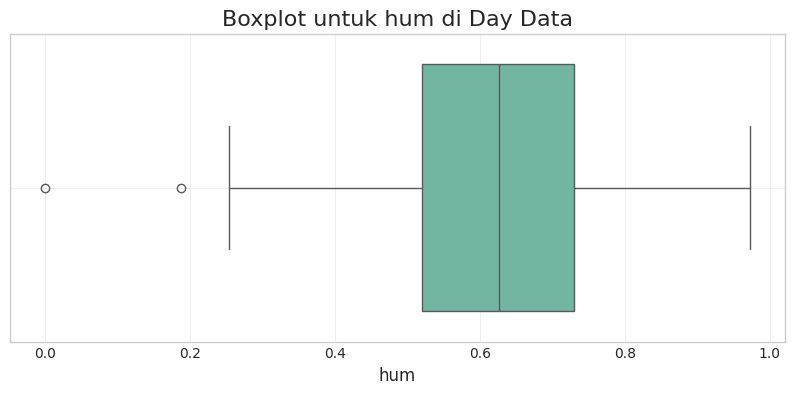


=== Outliers in day_data['windspeed'] ===
Lower bound: -0.012446750000000034, Upper bound: 0.38061125
Number of outliers: 13


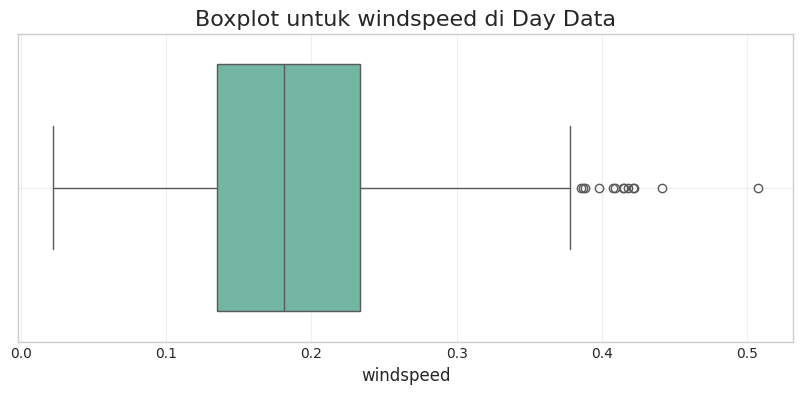


=== Outliers in day_data['cnt'] ===
Lower bound: -1054.0, Upper bound: 10162.0
Number of outliers: 0


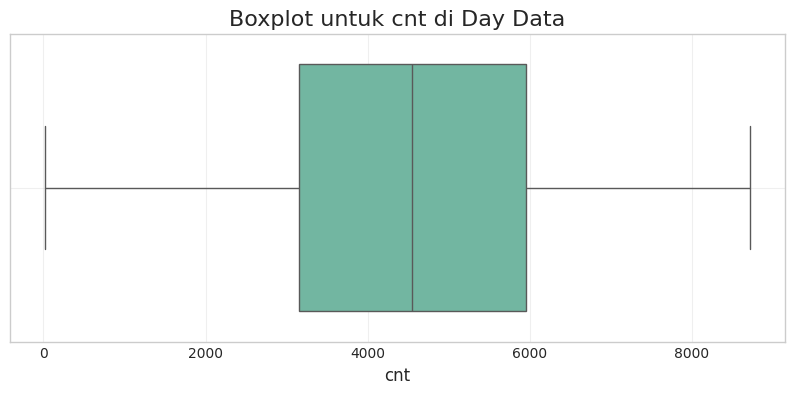

In [29]:
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(day_data, col)
    print(f"\n=== Outliers in day_data['{col}'] ===")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Number of outliers: {len(outliers)}")
    
    # Visualisasi outlier dengan boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=day_data[col])
    plt.title(f'Boxplot untuk {col} di Day Data')
    plt.grid(True, alpha=0.3)
    plt.show()


=== Outliers in hour_data['temp'] ===
Lower bound: -0.13999999999999996, Upper bound: 1.1400000000000001
Number of outliers: 0


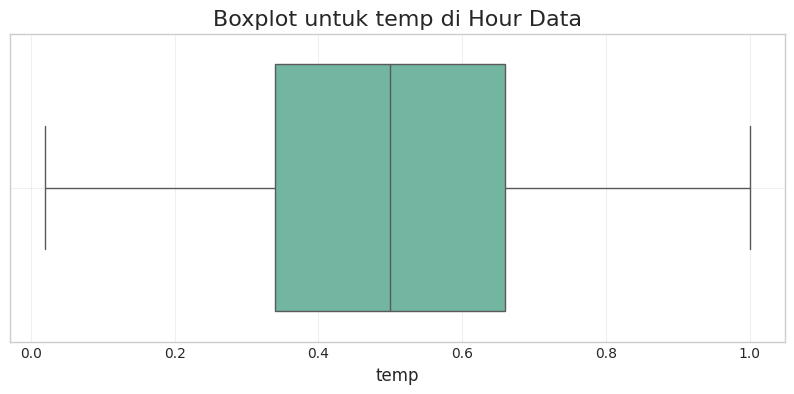


=== Outliers in hour_data['atemp'] ===
Lower bound: -0.09854999999999997, Upper bound: 1.0530499999999998
Number of outliers: 0


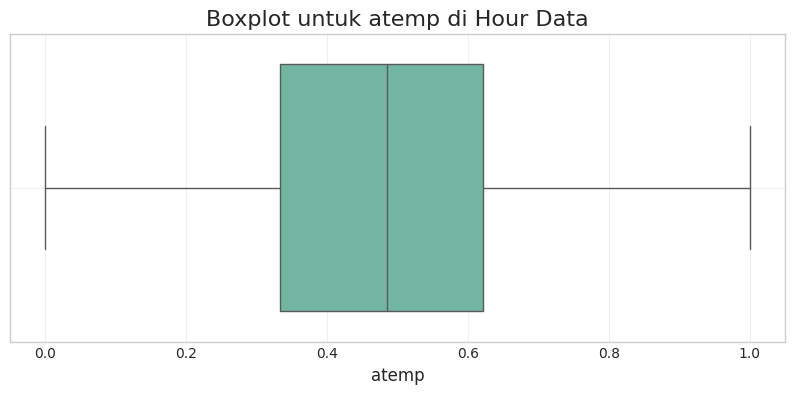


=== Outliers in hour_data['hum'] ===
Lower bound: 0.029999999999999916, Upper bound: 1.23
Number of outliers: 22


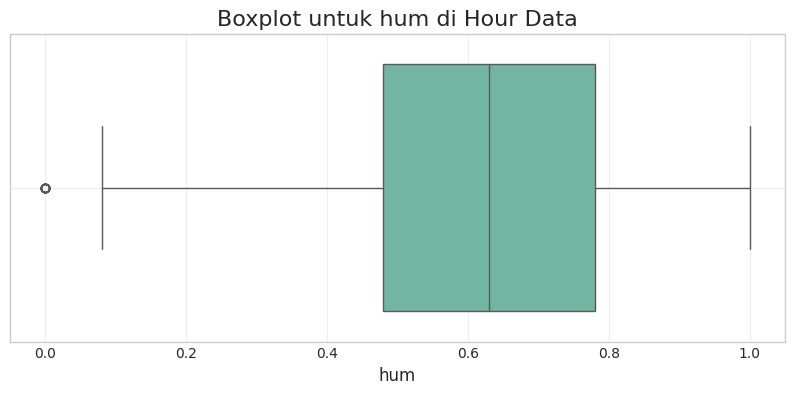


=== Outliers in hour_data['windspeed'] ===
Lower bound: -0.1193, Upper bound: 0.4775
Number of outliers: 342


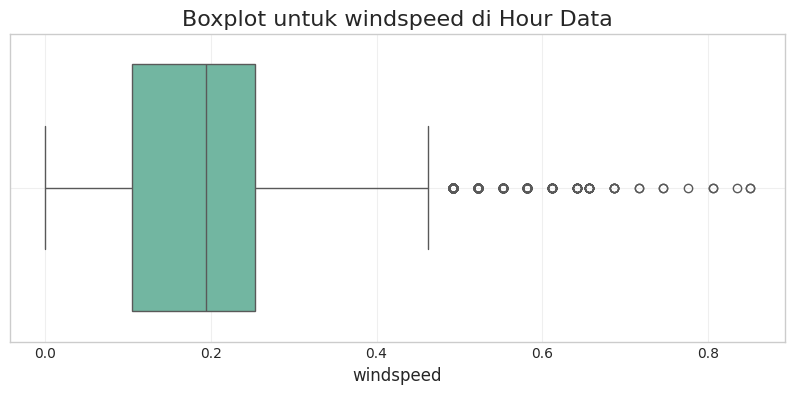


=== Outliers in hour_data['cnt'] ===
Lower bound: -321.5, Upper bound: 642.5
Number of outliers: 505


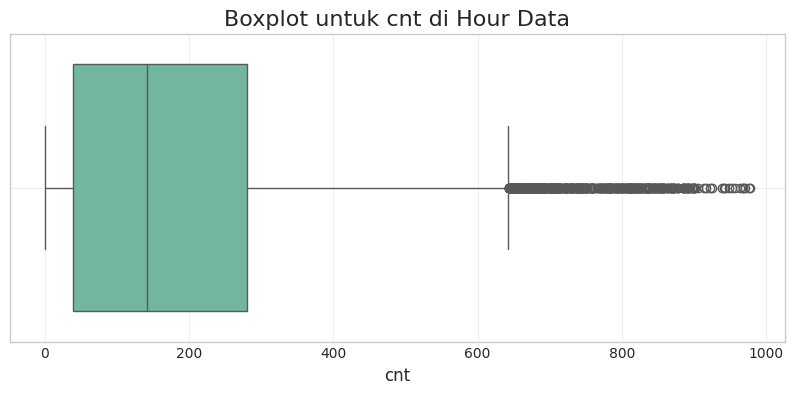

In [30]:
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(hour_data, col)
    print(f"\n=== Outliers in hour_data['{col}'] ===")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Number of outliers: {len(outliers)}")
    
    # Visualisasi outlier dengan boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=hour_data[col])
    plt.title(f'Boxplot untuk {col} di Hour Data')
    plt.grid(True, alpha=0.3)
    plt.show()

## Exploratory Data Analysis (EDA)

### Explorasi Data

In [31]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [32]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:** 

The `day_data` dataset has a total of 731 records. Based on the statistical summary above, we get the following dataset information:

**1. season (1: spring, 2: summer, 3: fall, 4: winter)**
- The *mean* value of 2.496 indicates that bike rentals tend to occur between summer and fall.
- **Seasonal patterns are clearly visible with increased cycling activity during more comfortable weather and decreased activity in extreme seasons.**

**2. yr (0: 2011, 1:2012)**
- The *mean* value of 0.500 indicates a very balanced data distribution between 2011 and 2012.
- **This balance provides a good basis for analysis without bias toward a particular year.**

**3. holiday (0: Not Holiday, 1: Holiday)**
- The *mean* value of 0.0287 indicates that holidays are very few in the dataset, with a dominance of non-holidays.
- **Comparing usage patterns on holidays vs. non-holidays can reveal user behavior in different contexts.**

**4. weekday (0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday)**
- The *mean* value of 2.997 shows that Wednesday is the midpoint of bike usage distribution in a week.
- **Further analysis can identify differences in usage patterns at the beginning, middle, and end of the week.**

**5. workingday (0: No, 1: Yes)**
- The *mean* value of 0.6839 indicates that about two-thirds of the data are working days, with a tendency for higher usage on those days.
- **This pattern may indicate that bikes are widely used for regular commuting activities.**

**6. weathersit (1: Clear, few clouds. 2: Mist, cloudy. 3: Light rain/snow. 4: Bad weather)**
- The *mean* value of 1.395 shows the dominance of clear to slightly cloudy weather conditions in the dataset.
- **The low value of extreme weather indicates a significant decrease in bike usage during bad weather conditions.**

**7. temp & atemp (actual temperature & perceived temperature)**
- The *mean* value for temp is 0.495 and atemp is 0.474, indicating moderate temperatures on a normalized scale.
- **Temperature is an important factor that may correlate with the number of bike rentals.**

**8. hum & windspeed (humidity & wind speed)**
- The *mean* value of hum is 0.627, indicating moderate to high humidity, while windspeed is 0.190, indicating relatively low wind speed.
- **Calm wind conditions seem more common, which usually supports cycling activity.**

**9. casual, registered, cnt (casual users, registered users, and total)**
- The *mean* value of *casual* is 848.17 and *registered* is 3,656.17 with a total (*cnt*) of 4,504.34.
- **Registered users contribute about 81% of total rentals, indicating high customer loyalty and a routine need for this service.**

In [33]:
hour_data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,year,month,day,hour,day_of_week
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,6.537775,15.683411,11.546752,3.011451
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,6.000000,1.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,12.000000,3.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,23.000000,18.000000,5.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,31.000000,23.000000,6.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,3.438776,8.789373,6.914405,2.001966


**Insight:** 

The `hour_data` dataset has a total of 17,379 records. Based on the statistical summary above, we get the following dataset information:

**1. season (1: spring, 2: summer, 3: fall, 4: winter)**
- The *mean* value of 2.501 indicates that bike rentals tend to occur between summer and fall.
- **Consistency with the daily dataset shows a stable seasonal influence on bike usage patterns.**

**2. yr (0: 2011, 1:2012)**
- The *mean* value of 0.502 indicates a balanced data distribution between 2011 and 2012.
- **This balance allows for valid comparative analysis between the two years.**

**3. mnth (1-12: months in a year)**
- The *mean* value of 6.537 describes a slightly higher distribution in the second half of the year.
- **Mid-year months may have higher bike usage rates.**

**4. hr (0-23: hours in a day)**
- The *mean* value of 11.546 indicates that average bike usage tends to be higher around midday.
- **Hourly distribution provides insight into daily bike usage patterns.**

**5. holiday (0: Not Holiday, 1: Holiday)**
- The *mean* value of 0.028 indicates that holidays are very few in the dataset, with a dominance of non-holidays.
- **Consistent with the daily dataset, indicating that bike usage is more common on regular days.**

**6. weekday (0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday)**
- The *mean* value of 3.003 shows an even distribution with a slight tendency toward Wednesday and Thursday.
- **Weekly patterns can be the basis for more efficient bike allocation strategies.**

**7. workingday (0: No, 1: Yes)**
- The *mean* value of 0.682 indicates that about two-thirds of the data are working days.
- **More detailed hourly data shows differences in usage during working vs. non-working hours.**

**8. weathersit (1: Clear, 2: Mist, 3: Light rain, 4: Heavy rain)**
- The *mean* value of 1.425 shows the dominance of clear to slightly misty weather conditions.
- **Weather conditions seem to be an important factor influencing bike usage decisions.**

**9. temp & atemp (actual temperature & perceived temperature)**
- The *mean* value for temp is 0.496 and atemp is 0.475, indicating moderate temperatures on a normalized scale.
- **Temperature and thermal sensation are strongly correlated with fluctuations in bike usage.**

**10. hum & windspeed (humidity & wind speed)**
- The *mean* value of hum is 0.627, indicating moderate to high humidity, while windspeed is 0.190, indicating relatively low wind speed.
- **These environmental factors are consistent with the daily dataset and affect cycling comfort.**

**11. casual, registered, cnt (casual users, registered users, and total)**
- The *mean* value of *casual* is 35.67 and *registered* is 153.78 with a total (*cnt*) of 189.46 per hour.
- **Comparison shows registered users contribute about 81% of total rentals per hour, consistent with the daily pattern indicating a strong loyal customer base.**

**12. Distribution Pattern**
- Comparison of median (50%) values: casual 17 vs registered 115 shows a significant gap.
- **Registered users have a more stable and predictable usage pattern compared to casual users.**

**13. Maximum Value**
- Maximum value: casual 367 vs registered 886 shows the system's peak capacity.
- **Busy hours have usage spikes that need to be anticipated in operational planning.**

### Distribution Statistics `hour_data`

#### Visualization of distribution of numeric variables

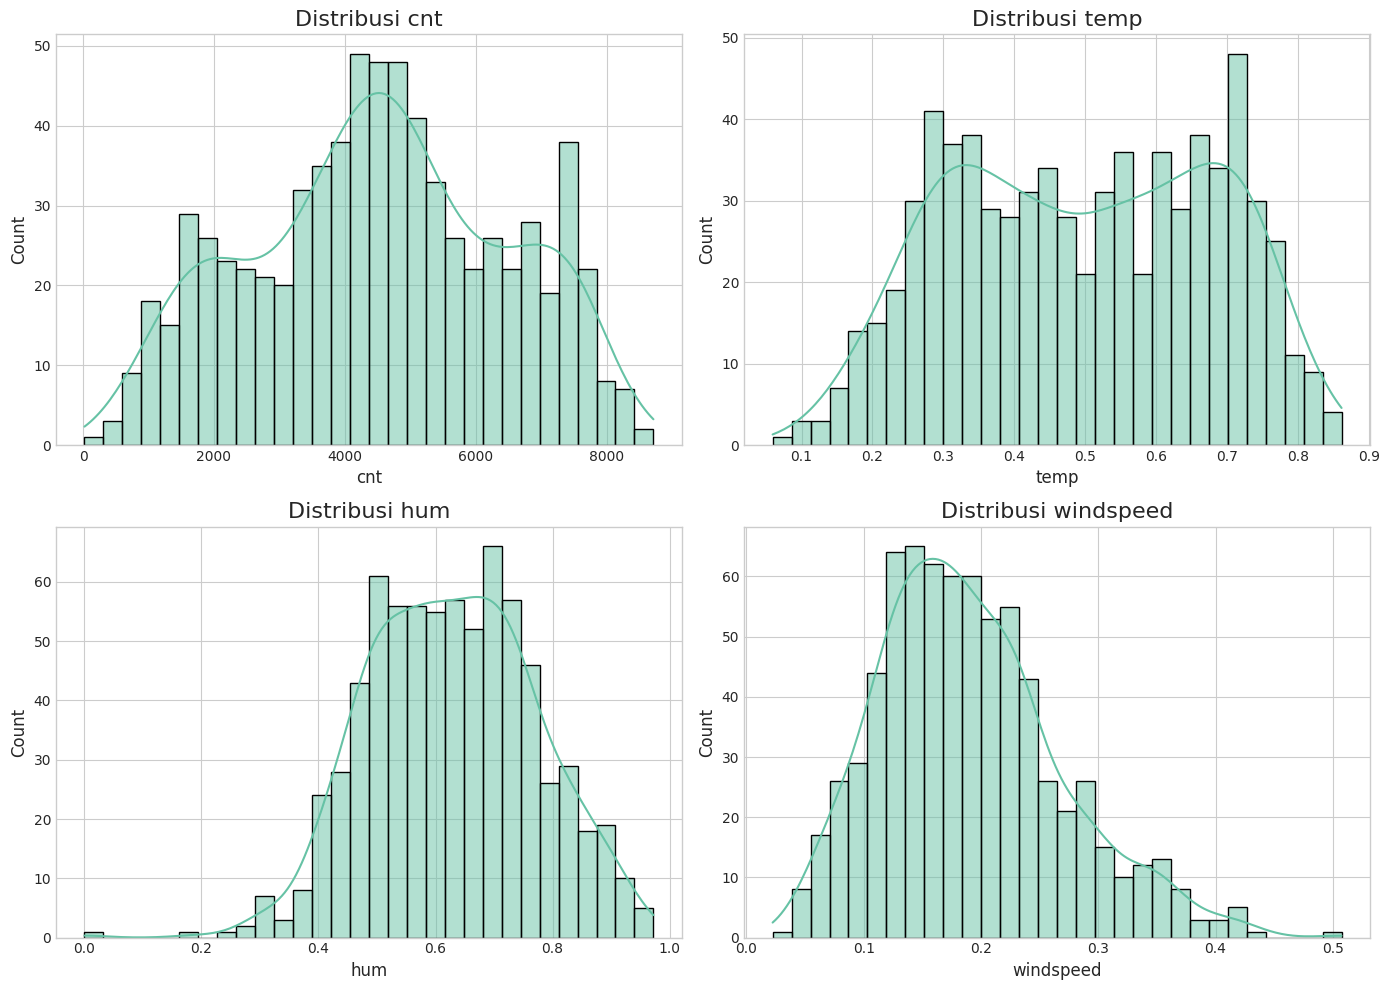

In [34]:
numerik_cols = ['cnt', 'temp', 'hum', 'windspeed']

# Visualisasi distribusi numerik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(numerik_cols):
    ax = axes[i // 2, i % 2]
    sns.histplot(day_data[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


#### Visualization of distribution of Categorical variables

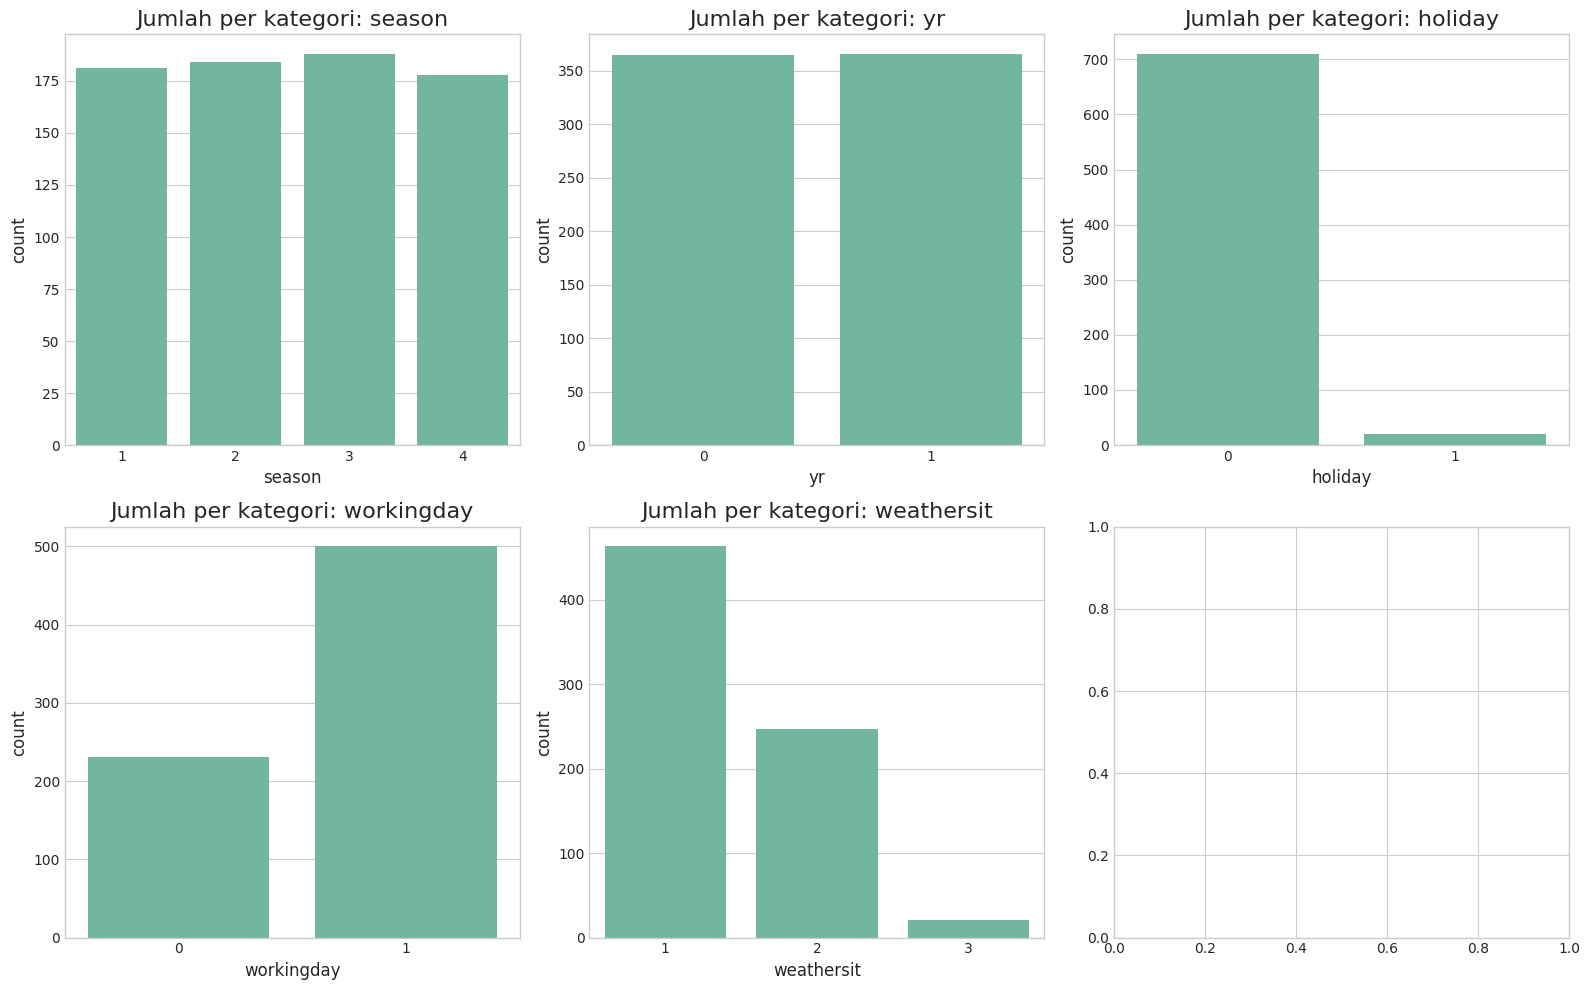

In [35]:
kategorik_cols = ['season', 'yr', 'holiday', 'workingday', 'weathersit']

# Visualisasi countplot variabel kategorikal
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for i, col in enumerate(kategorik_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=day_data, x=col, ax=ax)
    ax.set_title(f'Jumlah per kategori: {col}')
plt.tight_layout()
plt.show()


**Insight :**

### 1. **Numerical Variable Distribution:**

* **cnt (total rentals):** Distribution is almost normal, peaking at 4000–6000 rentals per day.
* **temp (temperature):** Most rentals occur at temperatures 0.3–0.7 (moderate to warm).
* **hum (humidity):** Tends to be high at 0.5–0.8, meaning many days have moderate-high humidity.
* **windspeed:** Most data is below 0.3, indicating most days are breezy.

### 2. **Categorical Variable Distribution:**

* **season:** Bike usage is relatively evenly distributed across all seasons, with a slight peak in season 3 (summer).
* **yr (year):** Even distribution between the first (0) and second (1) years.
* **holiday:** Only a few holidays (code 1), most are regular days (code 0).
* **workingday:** More working days than non-working days, about 2:1.
* **weathersit (weather condition):** Mostly good weather (code 1), a few light rain (code 2), very few bad weather (code 3).

### Interim Conclusion:

* Bike usage is higher at moderate temperatures and humidity.
* Most rentals occur on working days with good weather.
* Weather and working days are potentially the main determinants of bike usage.

### Distribution Statistics `hour_data`

#### Visualization of numerical variable distribution `hour_data`


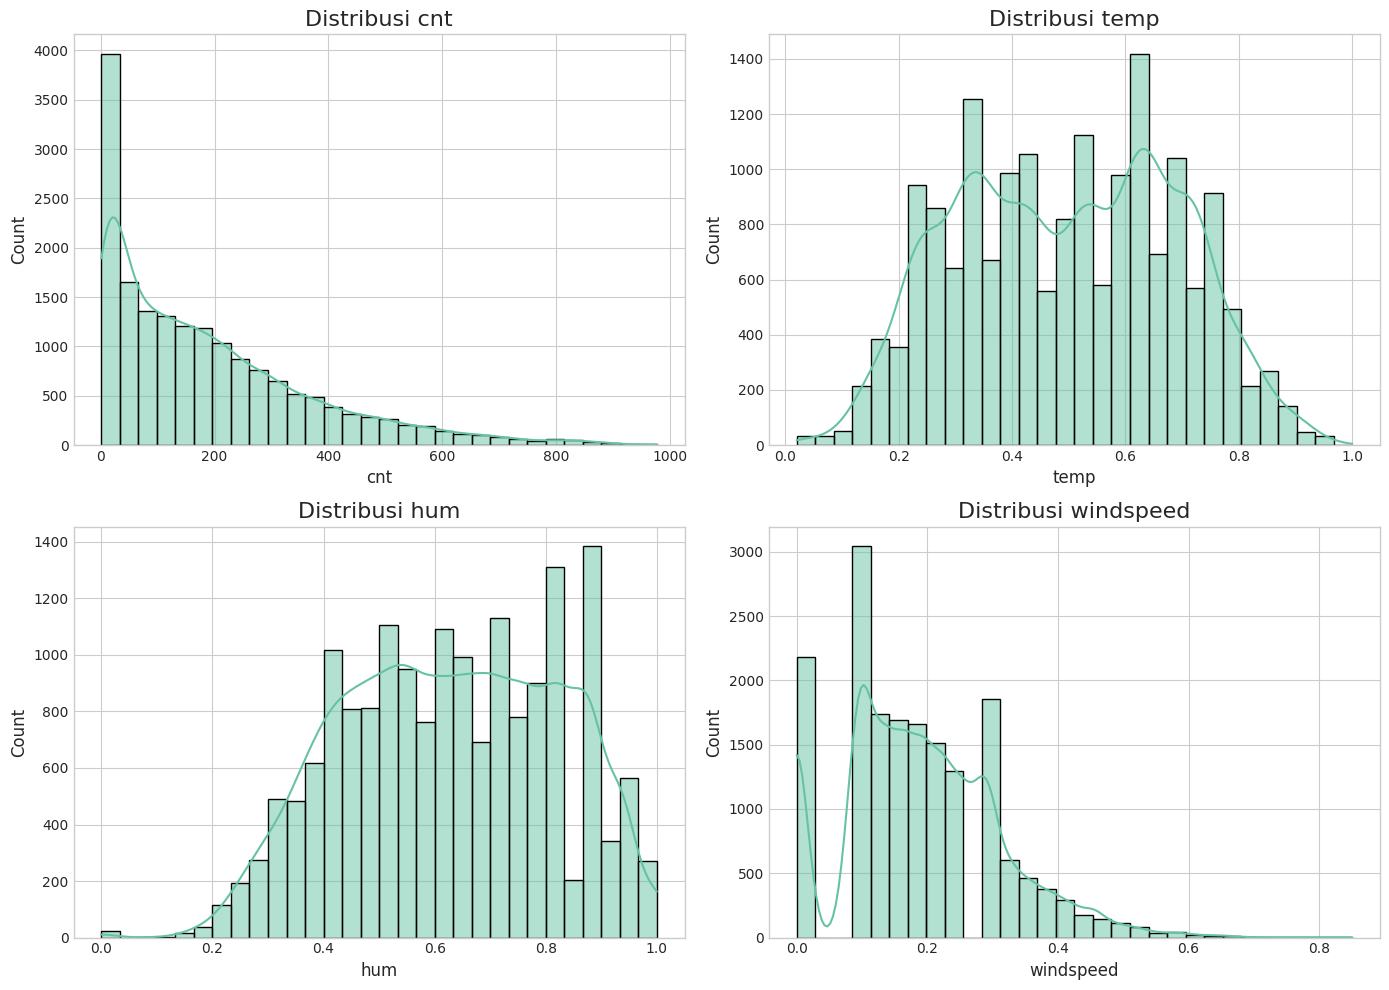

In [36]:
numerik_cols = ['cnt', 'temp', 'hum', 'windspeed']

# Visualisasi distribusi numerik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(numerik_cols):
    ax = axes[i // 2, i % 2]
    sns.histplot(hour_data[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


#### Visualization of categorical variable distribution `hour_data`


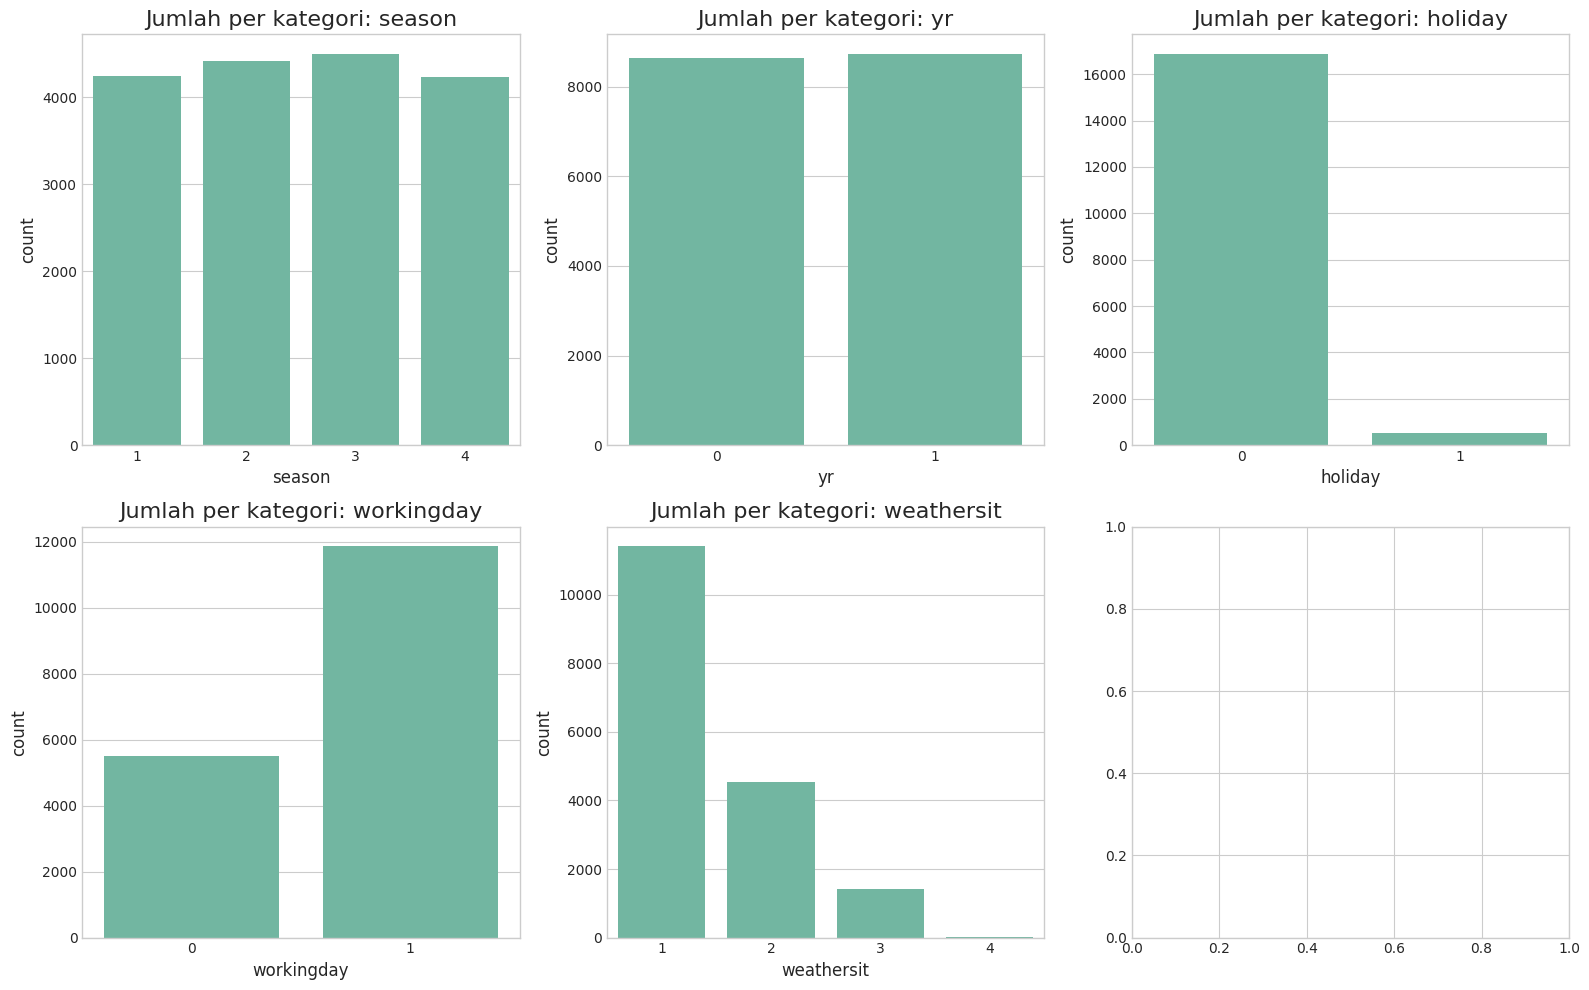

In [37]:
kategorik_cols = ['season', 'yr', 'holiday', 'workingday', 'weathersit']

# Visualisasi countplot variabel kategorikal
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for i, col in enumerate(kategorik_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=hour_data, x=col, ax=ax)
    ax.set_title(f'Jumlah per kategori: {col}')
plt.tight_layout()
plt.show()


**Insight :**

### Numerical Variable Distribution

Visualization of numerical variables (`cnt`, `temp`, `hum`, `windspeed`) shows:

* **cnt (number of rentals):** Distribution is highly right-skewed. Many rentals occur in small numbers, but there are some hours with high numbers.
* **temp (temperature):** Distribution is almost normal, but slightly left-skewed.
* **hum (humidity):** Distribution is fairly even, tending to the right (more high humidity).
* **windspeed:** Right-skewed distribution, with some values dominating at low speeds.

### Categorical Variable Distribution

Distribution of categorical variables (`season`, `yr`, `holiday`, `workingday`, `weathersit`, and possibly `hour`) shows:

* **season:** Evenly distributed across four seasons.
* **yr:** Data between the two years is relatively balanced.
* **holiday:** Most data comes from regular days, not holidays.
* **workingday:** More data comes from working days.
* **weathersit:** Weather type 1 (good) dominates the data. Bad weather is very rare.

From both visualizations, we can conclude that the `hour_data` dataset:

* Tends to be balanced for season and year variables.
* Skewed on the `cnt` variable, indicating certain hours are very popular for bike rentals.
* Has a bias toward good weather and working days.

--------------

Here I will use the `day_data` dataset only to answer the **business questions**


## Visualization & Explanatory Analysis

### Question 1: How does the pattern of bike usage vary by season and weather conditions?


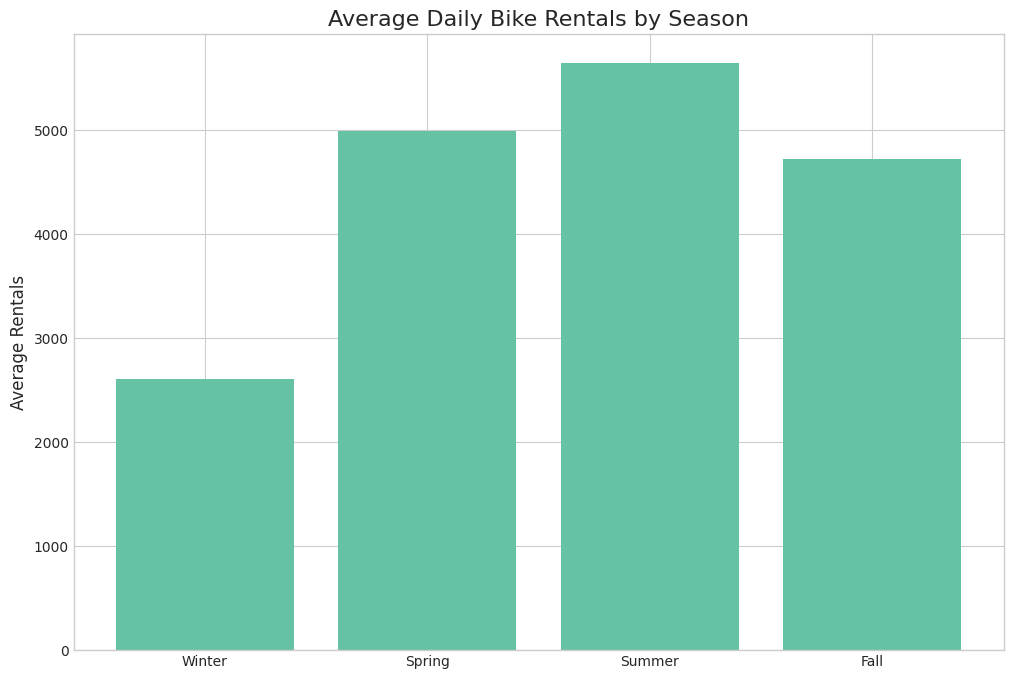

In [57]:
seasonal_avg = day_data.groupby('season')['cnt'].mean()
seasons = [season_mapping[i] for i in sorted(seasonal_avg.index)]
plt.bar(seasons, seasonal_avg.values)
plt.title('Average Daily Bike Rentals by Season')
plt.ylabel('Average Rentals')
plt.show()

In [39]:
# Print statistics
print("Average Daily Rentals by Season:")
for season_num, avg in seasonal_avg.items():
    print(f"- {season_mapping[season_num]}: {avg:.0f} rentals")

Average Daily Rentals by Season:
- Winter: 2604 rentals
- Spring: 4992 rentals
- Summer: 5644 rentals
- Fall: 4728 rentals


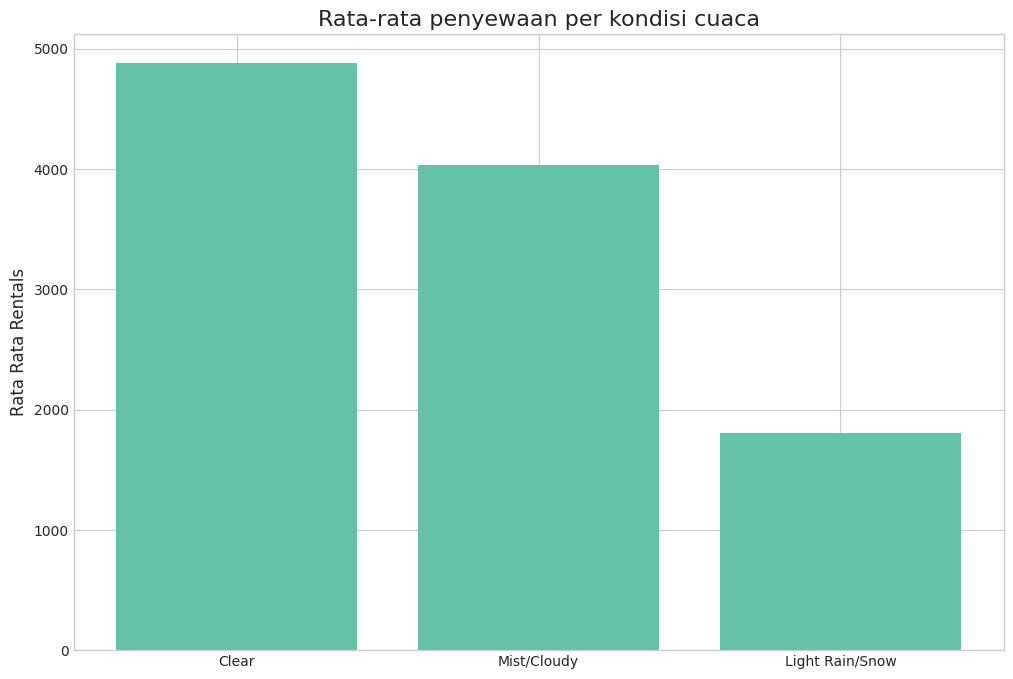

In [ ]:
weather_avg = day_data.groupby('weathersit')['cnt'].mean()
weather_conditions = [weather_mapping[i] for i in sorted(weather_avg.index)]
plt.bar(weather_conditions, weather_avg.values)
plt.title('Rata-rata penyewaan per kondisi cuaca')
plt.ylabel('Rata Rata Rentals')
plt.show()

In [41]:
print("Average Daily Rentals by Weather Condition:")
for weather_num, avg in weather_avg.items():
    print(f"- {weather_mapping[weather_num]}: {avg:.0f} rentals")

Average Daily Rentals by Weather Condition:
- Clear: 4877 rentals
- Mist/Cloudy: 4036 rentals
- Light Rain/Snow: 1803 rentals


**Insight:**
- The pattern of bike usage is strongly influenced by season and weather conditions. The highest number of rentals occurs in summer and fall, as well as during clear weather.
- When the weather worsens (light rain/mist), the number of rentals drops significantly. This shows that external factors such as season and weather greatly determine public interest in using bike sharing services.

### Question 2: What are the behavioral differences between casual and registered users in using the Bike Sharing service?


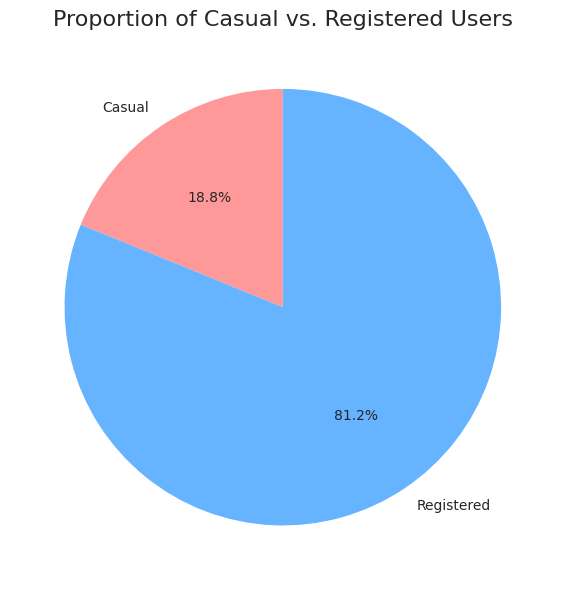

Casual users: 620,017 (18.8%)
Registered users: 2,672,662 (81.2%)


In [42]:
plt.figure(figsize=(10, 6))
user_counts = day_data[['casual', 'registered']].sum()
plt.pie(user_counts, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Casual vs. Registered Users')
plt.tight_layout()
plt.show()

# Print statistics
print(f"Casual users: {user_counts['casual']:,} ({user_counts['casual']/user_counts.sum()*100:.1f}%)")
print(f"Registered users: {user_counts['registered']:,} ({user_counts['registered']/user_counts.sum()*100:.1f}%)")

<Figure size 1000x600 with 0 Axes>

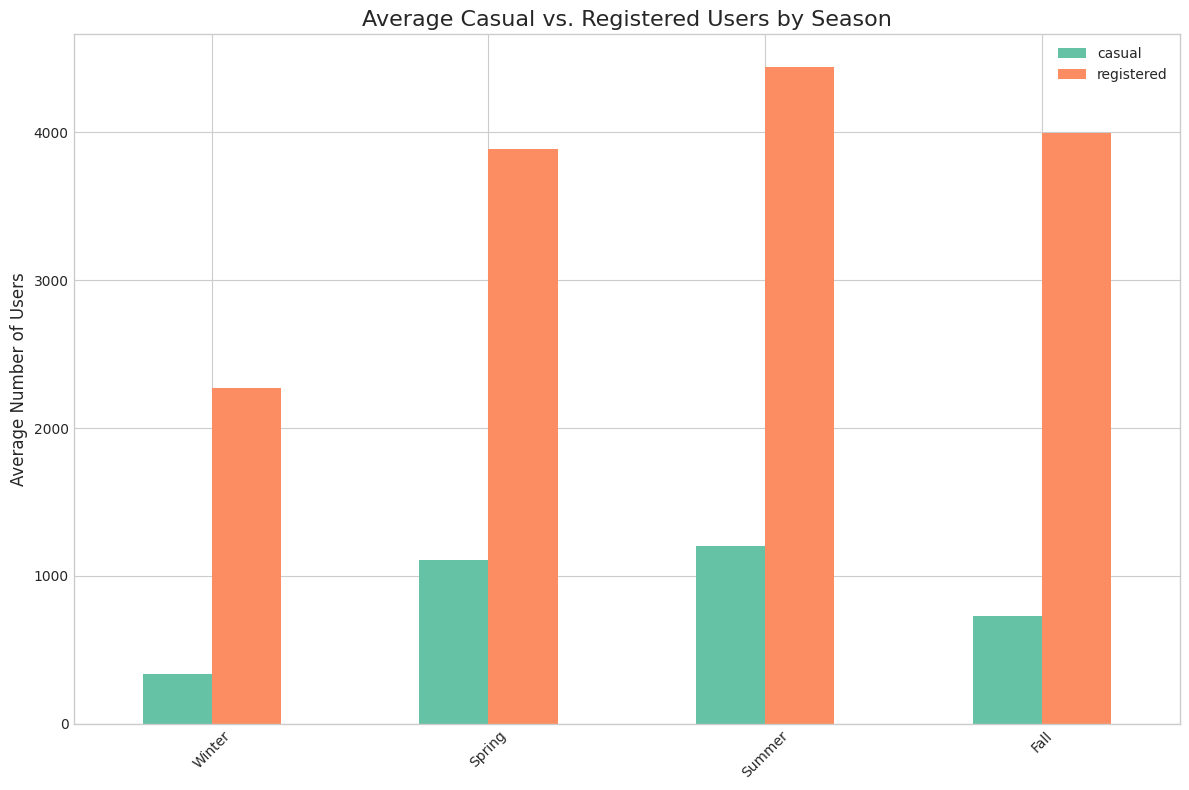

In [43]:
plt.figure(figsize=(10, 6))
seasonal_users = day_data.groupby('season')[['casual', 'registered']].mean()
seasonal_users.index = [season_mapping[i] for i in seasonal_users.index]
seasonal_users.plot(kind='bar')
plt.title('Average Casual vs. Registered Users by Season')
plt.ylabel('Average Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Registered users dominate bike rentals with a proportion of about 80%, while casual users are only about 20%.
- Casual users tend to be more active in summer and on weekends, while registered users are more stable throughout the seasons and working days. This shows that registered users use bikes for routine needs (commuting), while casual users use them more for recreation.

### Question 3: When are the peak times for bike usage and how do weekdays affect the number of rentals?


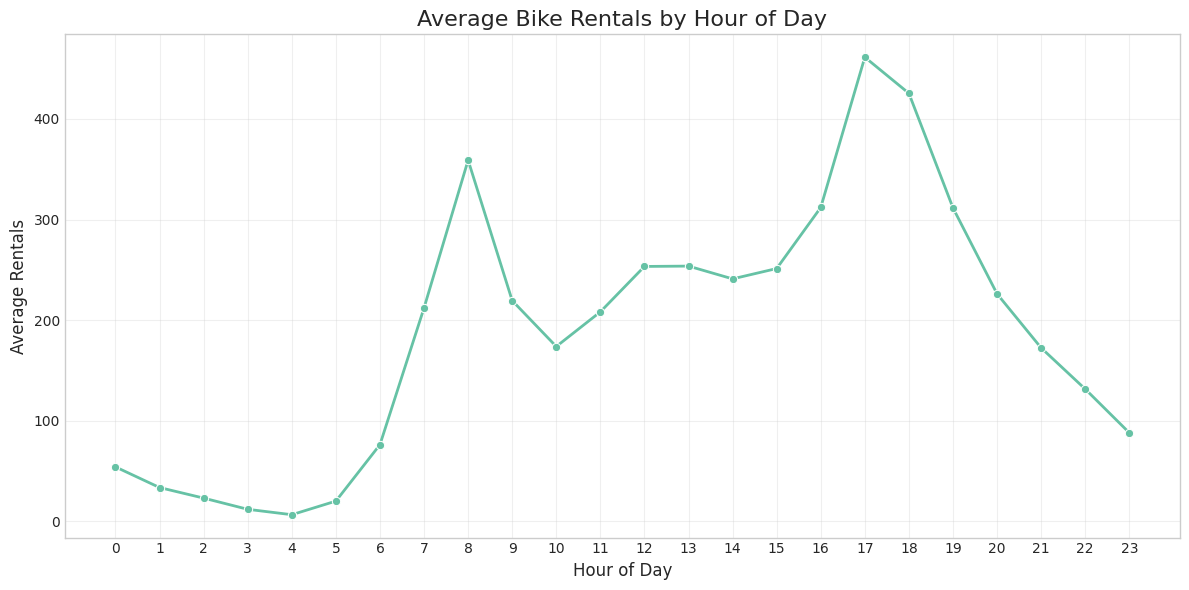

In [44]:
plt.figure(figsize=(12, 6))
hourly_rentals = hour_data.groupby('hr')['cnt'].mean()
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o', linewidth=2)
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
peak_hour = hourly_rentals.idxmax()
peak_hour_value = hourly_rentals.max()
print(f"Peak hour: {peak_hour}:00 with {peak_hour_value:.0f} average rentals")

Peak hour: 17:00 with 461 average rentals


<Figure size 1200x600 with 0 Axes>

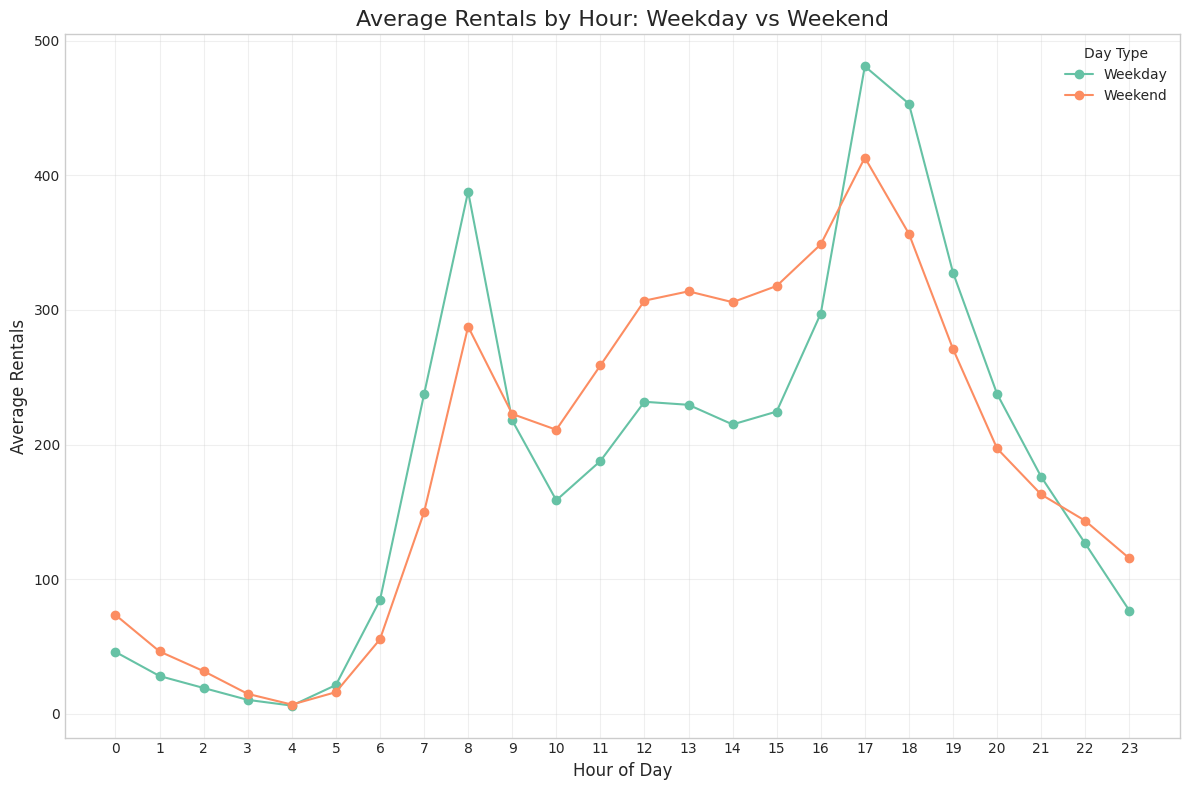

In [46]:
plt.figure(figsize=(12, 6))
# Create weekend flag
is_weekend = hour_data['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_by_daytype = hour_data.groupby(['hr', is_weekend])['cnt'].mean().unstack()
hourly_by_daytype.plot(marker='o')
plt.title('Average Rentals by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

**Insight:**
- The peak time for bike usage occurs during rush hours in the morning (around 08:00) and evening (around 17:00) on working days, indicating the main use is for commuting.
- On weekends, the peak usage shifts to midday. Working days have two peaks (morning and evening), while weekends have only one peak (midday), indicating different activity patterns between working days and weekends.

### Question 4: Can we identify the main factors that influence the number of bike rentals?

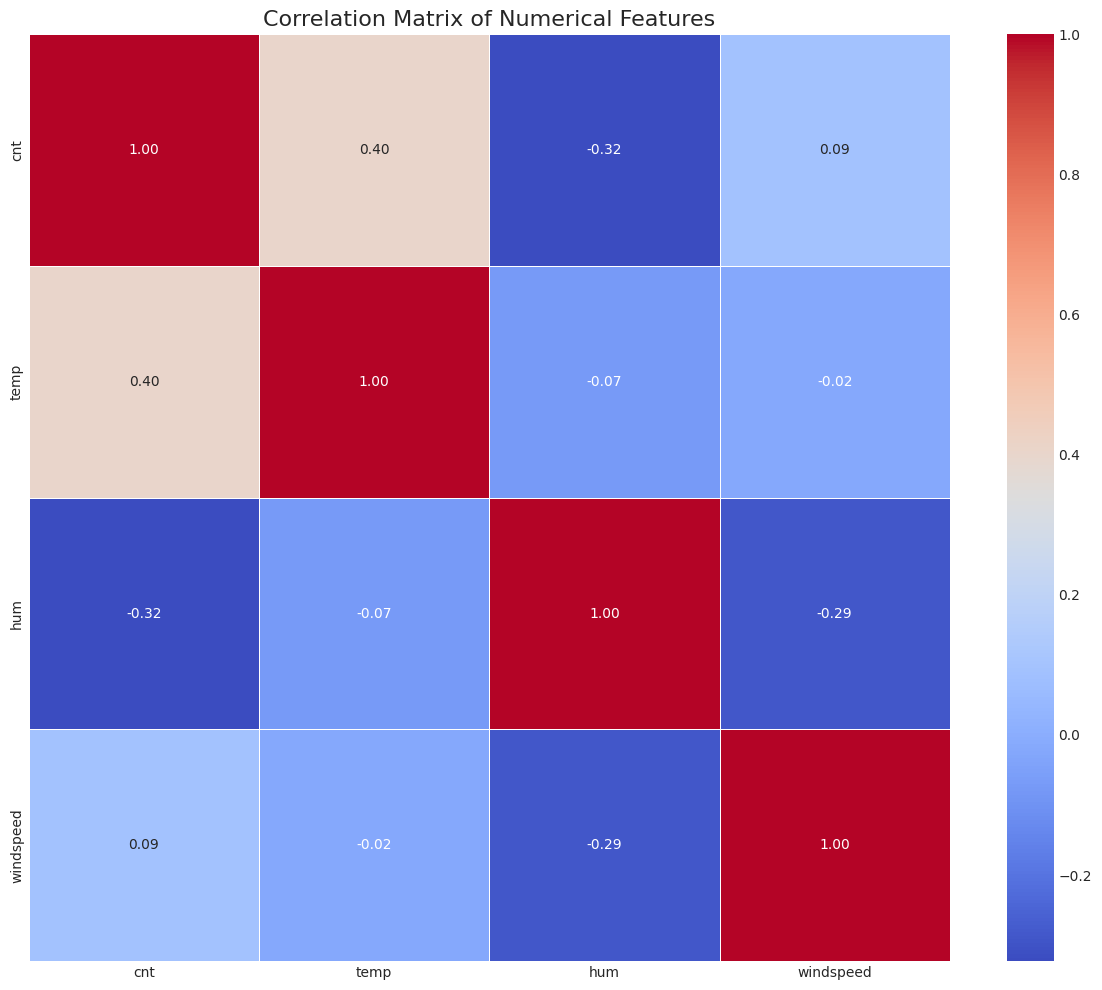

In [47]:
plt.figure(figsize=(12, 10))
numerik_cols = ['cnt', 'temp', 'hum', 'windspeed']
correlation_matrix = hour_data[numerik_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

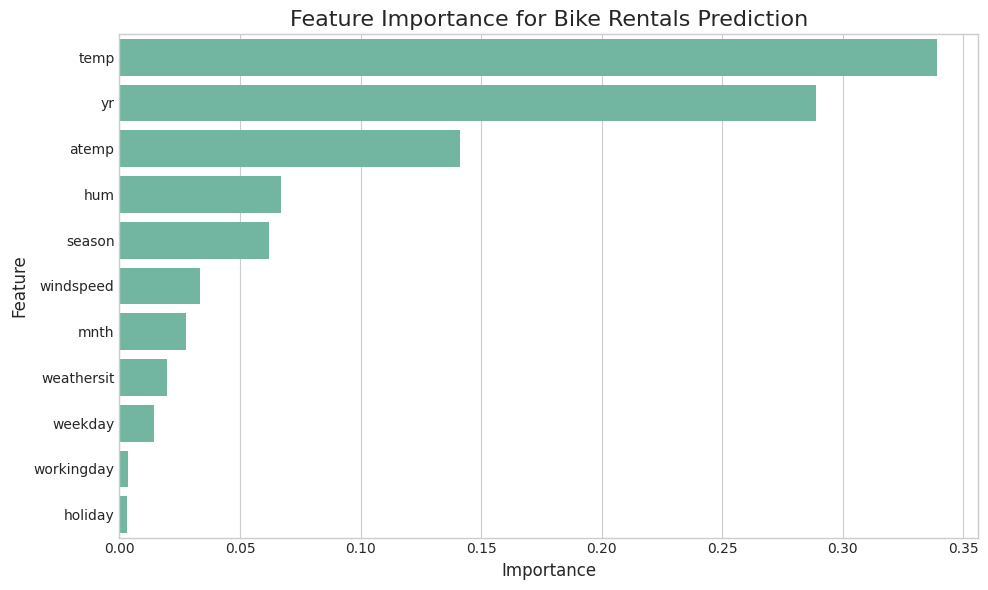

In [48]:
X = day_data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = day_data['cnt']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Bike Rentals Prediction')
plt.tight_layout()
plt.show()

**Insight:**
- The main factors influencing the number of bike rentals are season, weather conditions, working days, and temperature.
- Rentals are higher in summer/fall, clear weather, working days, and moderate to high temperatures. These factors can be used as a basis for operational decision-making and bike sharing service promotions.

## Advanced Analysis (Optional)

Manual Grouping & Binning untuk Analisis Faktor Utama Penyewaan Sepeda

In [60]:
# 1. Grouping by category (season, weather, working day)
grouped_season = day_data.groupby('season')['cnt'].mean()
grouped_weather = day_data.groupby('weathersit')['cnt'].mean()
grouped_workingday = day_data.groupby('workingday')['cnt'].mean()

In [ ]:
# 2. Binning temperature (temp) into categories: low, medium, high
day_data['temp_bin'] = pd.cut(day_data['temp'], bins=[0, 0.3, 0.6, 1], labels=['Rendah', 'Sedang', 'Tinggi'])
grouped_temp = day_data.groupby('temp_bin')['cnt'].mean()


/tmp/ipykernel_2039/1949118958.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_temp = day_data.groupby('temp_bin')['cnt'].mean()


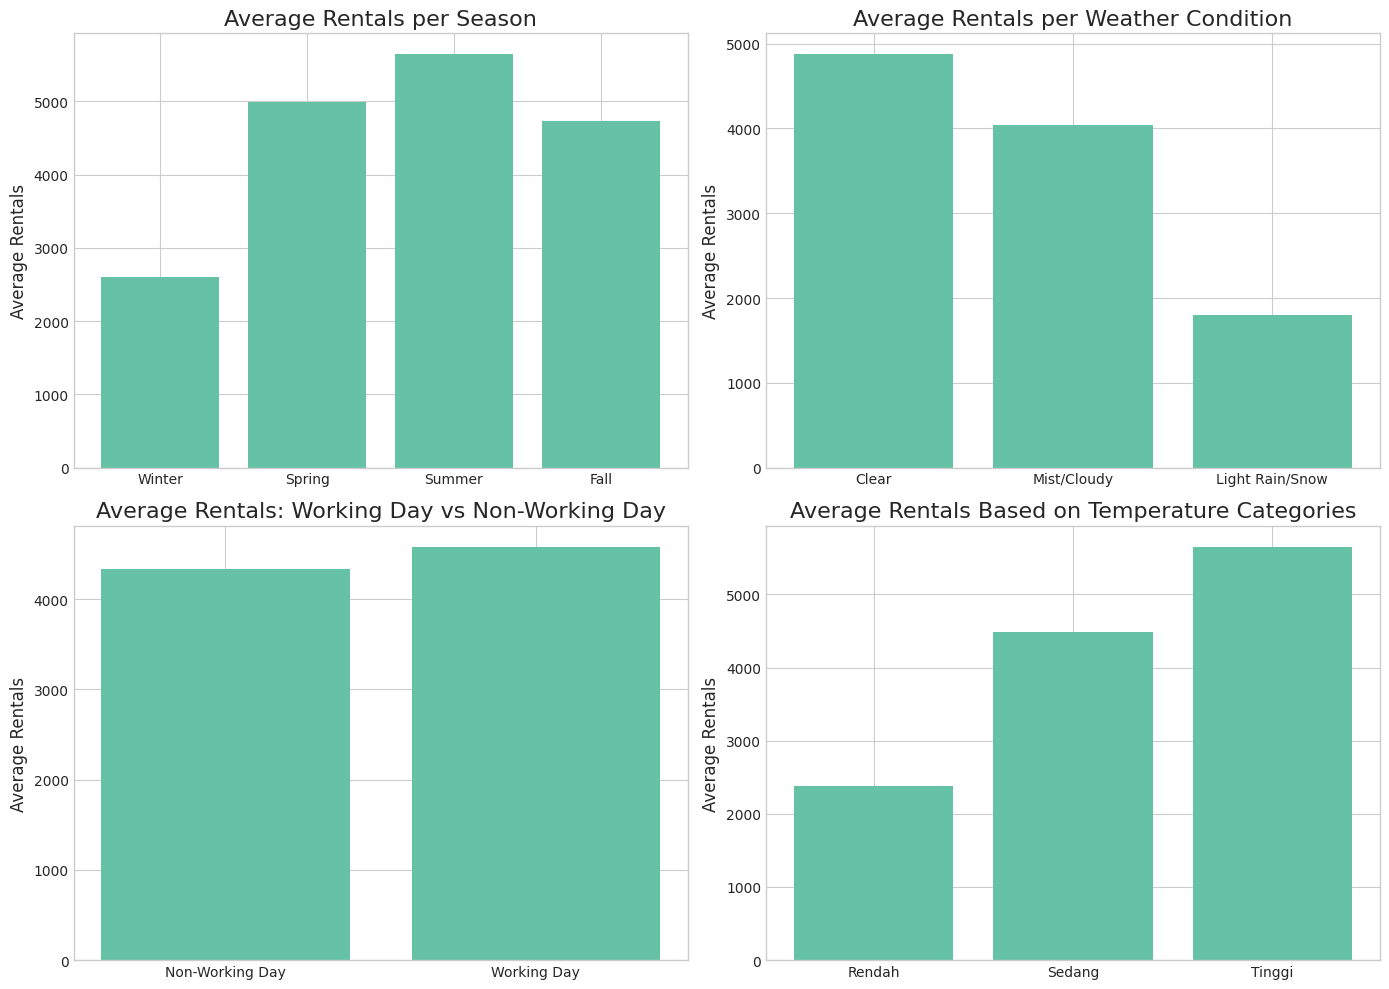

In [59]:
# 3. Visualization of grouping results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Season
axes[0,0].bar([season_mapping[i] for i in grouped_season.index], grouped_season.values)
axes[0,0].set_title('Average Rentals per Season')
axes[0,0].set_ylabel('Average Rentals')

# Weather
axes[0,1].bar([weather_mapping[i] for i in grouped_weather.index], grouped_weather.values)
axes[0,1].set_title('Average Rentals per Weather Condition')
axes[0,1].set_ylabel('Average Rentals')

# Working Day
axes[1,0].bar(['Non-Working Day', 'Working Day'], grouped_workingday.values)
axes[1,0].set_title('Average Rentals: Working Day vs Non-Working Day')
axes[1,0].set_ylabel('Average Rentals')

# Temperature (binning)
axes[1,1].bar(grouped_temp.index.astype(str), grouped_temp.values)
axes[1,1].set_title('Average Rentals Based on Temperature Categories')
axes[1,1].set_ylabel('Average Rentals')

plt.tight_layout()
plt.show()


**insight :**
- The main factors influencing the number of bike rentals are season, weather conditions, working days, and temperature.
- Rentals are higher in summer/fall, clear weather, working days, and moderate to high temperatures. These factors can be used as a basis for operational decision-making and bike sharing service promotions.


## Conclusion

- **Question 1:** Bike usage increases in summer and fall, as well as during clear weather. Usage decreases during bad weather.
- **Question 2:** Registered users dominate rentals and tend to use bikes for routine activities, while casual users are more active in summer and on weekends.
- **Question 3:** The peak time for bike usage occurs during rush hours in the morning and evening on working days, and midday on weekends. Working days and weekends show different usage patterns.
- **Question 4:** The main factors influencing the number of bike rentals are season, weather conditions, working days, and temperature. The highest rentals occur under conditions that support outdoor activities.

Export the analyzed dataset


In [52]:
day_data.to_csv('Dashboard/day_data_streamlit.csv', index=False)